In [22]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:86% !important;}
div.cell.code_cell.rendered{width:100%;}
div.CodeMirror {font-family:Consolas; font-size:15pt;}
div.output {font-size:15pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:15pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:15px;}
</style>
"""))

<b><font sixe="8" color="red">ch10.N차원배열다루기</font></b>
- [numpy API] (https://numpy.org/doc/stable/reference/index.html)
- N차원 배열 객체
- 2차원 배열은 행렬개념
- numpy 패키지는 C언어로 구현되어 고성능 수치 계산 패키지


In [2]:
import numpy as np
np.__version__

'1.23.5'

In [7]:
#np.arange() (from:stop:step)- from 부터 stop직전까지 step 씩 
a= np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열속성

In [3]:
from numpy import arange
a= arange(15).reshape(3,5) #3행 5열짜리 2차원 배열로 return 
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [9]:
type(a) #a변수의 타입

numpy.ndarray

In [11]:
a.dtype #a 배열 요소의 type

dtype('int32')

In [12]:
a.dtype.name

'int32'

In [14]:
a.itemsize #한 요소의 bytesize

4

In [15]:
a.ndim #차원수(축수)

2

In [16]:
a.size #배열 요소의 갯수

15

In [53]:
a.shape #배열의 구조(튜플)

(3, 5)

## 1.2 배열변경(구조,타입)

In [21]:
print('구조변경전',a,sep='\n')
a.shape=(5,3)
print('구조변경후',a,sep='\n')

구조변경전
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]
구조변경후
[[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


In [23]:
#타입변경(x)
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [24]:
a.dtype

dtype('int32')

In [25]:
a.itemsize

4

In [26]:
a.dtype = np.int64
a.dtype

dtype('int64')

In [81]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [27]:
#타입변경(O)
a= arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [28]:
a = a.astype(np.int64)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [76]:
a.dtype

dtype('int64')

In [33]:
a.itemsize

8

In [34]:
a.flatten()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [35]:
a.ravel()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64)

In [37]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

## 1.3 배열 저장

In [38]:
import pickle
with open('data/ch10_a.pkl','wb')as f:
    pickle.dump(a,f)

In [39]:
with open('data/ch10_a.pkl','rb')as f:
    load_a=pickle.load(f)

In [40]:
load_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [41]:
np.all(a==load_a) #a 넘파이 배열과 Load_a 넘파이 배열이 같은지 

True

In [42]:
np.save('data/ch10_a.npy',a)



In [43]:
load_a2=np.load('data/ch10_a.npy')
np.all(load_a2==a)

True

# 2절. 넘파이 배열
- array()함수 : 다른 파이썬 데이터 구조를 배열로 전환 
- arange(),ones(),zeros(),empty()
- 랜덤값을 가지는 함수들...
## 2.1 array() 함수로 넘파이 배열 만들기
array(list나 튜플, dtype=xxx, copy=T/F

In [44]:
a= np.array([2,4,6]) #정수의 기본타입은 int32/ 실수의 기본타입은 float 64
a

array([2, 4, 6])

In [48]:
a[1],a[2]

(4, 6)

In [54]:
b= np.array([[1.3,2.4],[4,5]])
b


array([[1.3, 2.4],
       [4. , 5. ]])

In [57]:

b =np.array([[1.3,2.4],[4,5]], dtype=np.float32).reshape(1, 4)
b

array([[1.3, 2.4, 4. , 5. ]], dtype=float32)

In [58]:
b.itemsize

4

In [59]:
b.astype(np.float64)

array([[1.29999995, 2.4000001 , 4.        , 5.        ]])

In [60]:
l = [[1, 2], [3.4, 4.5]]
for row in l:
    for data in row:
        print(data, end='\t')
    print()

1	2	
3.4	4.5	


In [86]:
c = np.array([[1, 2], [3.4, 4.5]], dtype=np.float32) #64가 안전하다.
for i, row in enumerate(c):
    for j, item in enumerate(row):
        print("{}행{}열:{}".format(i, j, item), end='\t')
    print()

0행0열:1.0	0행1열:2.0	
1행0열:3.4000000953674316	1행1열:4.5	


In [62]:
c = np.array([[1, 2, 3, 4, 5], [6, 7, 8, 9, 10]], dtype=np.int16)
c

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10]], dtype=int16)

In [63]:
c[0, 3]

4

In [64]:

c[:, 1:3] # 모든행, 1열부터 3열앞까지

array([[2, 3],
       [7, 8]], dtype=int16)

In [65]:
# 0행 2열~4열까지
c[0, 2:5]

array([3, 4, 5], dtype=int16)

In [66]:
# 모든행의 맨 마지막 열만 추출
c[:, -1]

array([ 5, 10], dtype=int16)

In [67]:
# 모든행의 맨 마지막 열을 제외한 추출
c[:, :-1]

array([[1, 2, 3, 4],
       [6, 7, 8, 9]], dtype=int16)

In [70]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=False) # d=c 얕은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소:{}'.format(id(c), id(d)))


c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[   1    2]
 [3333    4]]
d=
[[   1    2]
 [3333    4]]
c주소=3122033235728, d주소:3122033235728


In [71]:
c = np.array([[1, 2], [3, 4]])
d = np.array(c, copy=True) # d=c.copy() 깊은복사
print('c=', c, sep='\n')
print('d=', d, sep='\n')
d[1, 0] = 3333
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print('c주소={}, d주소:{}'.format(id(c), id(d)))

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
c=
[[1 2]
 [3 4]]
d=
[[   1    2]
 [3333    4]]
c주소=3122033238224, d주소:3122033238128


## 2.2 기본값이 있는 배열만들기
- np.zeros( (tup) ): 요소들이 다 0
- np.ones( (tupe)  ): 요소들이 다 1
- np.full(tup, 기본값) : 요소들이 다 기본값
- np.empty(tup):요소들이 임의의 값(메모리 상태에 따라 달라짐)
- ※ 위의 함수를 이용해서 생성된 배열은 기본 dtype이 float64, dtype속성 따라 지정

In [68]:
np.zeros(   (3,5) )

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [87]:
x = np.ones((3, 5))
x.dtype, x

(dtype('float64'),
 array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]))

In [69]:
np.full((2,5),-256)

array([[-256, -256, -256, -256, -256],
       [-256, -256, -256, -256, -256]])

In [88]:
np.empty( (2, 5) )

array([[nan,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.]])

## 2.3 랜덤값을 갖는 배열 만들기
-  np.random.random(tup): 0부터 1미만의 균등분포를 갖는 랜덤값
- np.random.uniform(low=0, high=1.0, size=tup): low부터 high 미만의 균등분포를 마지는 랜덤값
- np.random.normal(loc=0,scale=1.0,size=tup) : 평균 loc과 표준편자 scale을 가지는 정규분포 랜덤값
- np.random.rand(n): 균등분포의 1차원 난수 배열 발생(난수n개)
- np.random.randn(n): 표준정규분포(평균0, 표준편차 1인 정규분포)의 1차원 난수 배열발생(난수n개)
cf) np.random.randint(n):0부터 n 미만의 정수 난수 1개 발생

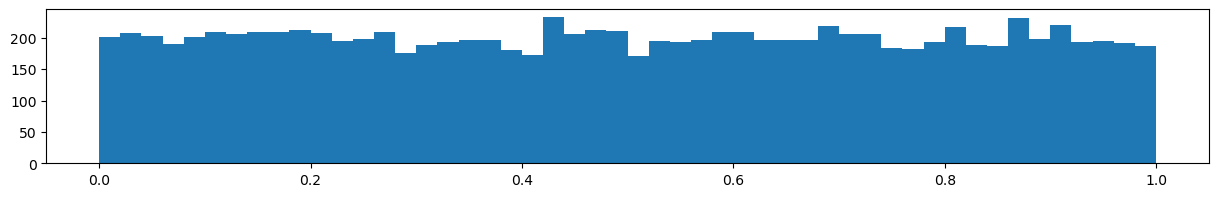

In [89]:
import matplotlib.pyplot as plt
x = np.random.rand(10000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=50)
plt.show()

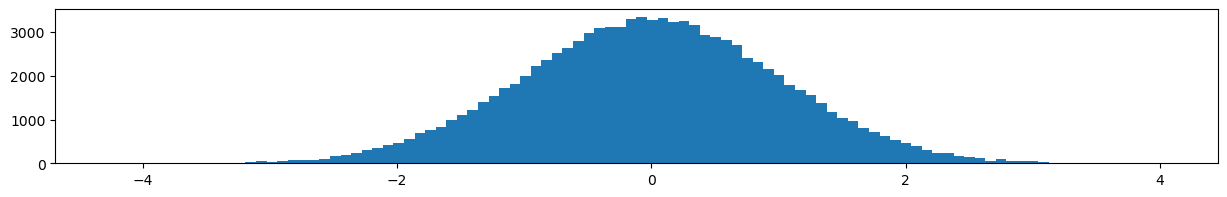

In [90]:
x = np.random.randn(100000)
plt.figure(figsize=(15, 2)) # 그래프 크기 figsize=(가로, 세로)
plt.hist(x, bins=100)
plt.show()

In [97]:
# 2차원 난수 배열
np.random.seed(12) # seed값을 맞추면 발생되는 난수 순서가 동일
np.random.random( (2, 5) ) # 0부터 1미만 균등분포 난수 배열

array([[0.15416284, 0.7400497 , 0.26331502, 0.53373939, 0.01457496],
       [0.91874701, 0.90071485, 0.03342143, 0.95694934, 0.13720932]])

In [98]:
np.random.uniform(-1, 10, (2, 5)) # -1~10미만의 균등분포 난수 배열

array([[ 2.12211188,  5.66691503,  9.3864765 ,  8.38009095, -0.97514843],
       [ 4.7334863 ,  5.07241397,  4.33915155,  7.44947569,  0.76788428]])

In [99]:
np.random.normal(10, 2, (2, 5)) # 평균10, 표준편차 2인 정규분포 난수 배열

array([[12.19191224,  7.5696624 , 12.68471274,  9.75570042, 12.02503095],
       [ 8.17226171,  7.94093959, 12.4195929 , 11.00374461, 10.27769235]])

## 2.4 연속된 값을 가지는 배열만들기
- np.arange(from,stop,by,dtype) : from 부터 stop앞까지 by씩 증감하는 정수 배열 
- np.linspace(from,to,count):from부터 to까지(to포함) count개 숫자를 1차원 배열 

In [93]:
#linspace는 많은 수의 점들을 생성
x= np.linspace(0,2*np.pi,1000)
y= np.sin(x)

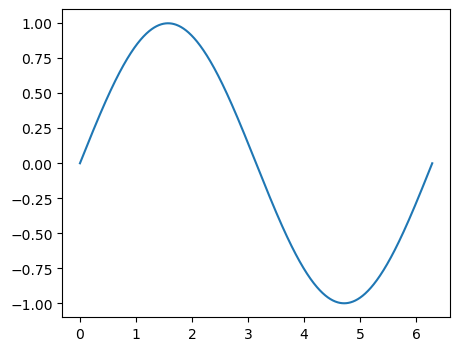

In [94]:
import matplotlib.pyplot as plt
plt.figure(figsize=(5,4))
plt.plot(x,y)
plt.show()

In [96]:
np.linspace(0,2,20).reshape(2,10)

array([[0.        , 0.10526316, 0.21052632, 0.31578947, 0.42105263,
        0.52631579, 0.63157895, 0.73684211, 0.84210526, 0.94736842],
       [1.05263158, 1.15789474, 1.26315789, 1.36842105, 1.47368421,
        1.57894737, 1.68421053, 1.78947368, 1.89473684, 2.        ]])

In [100]:
np.arange(10, 30, 3, dtype=np.int8)

array([10, 13, 16, 19, 22, 25, 28], dtype=int8)

## 2.5 배열의 차원 변경하기 
- reshape([면수, ] 행수, 열수): -1이 올수도
- resize([면수, ] 행수, 열수): -1불가
- T: 전치행렬로 변환
- transpose(): 전치행렬로 변환 ,실행결과과 출력되면 배열이 수정되지 않고 실행결과가 없으면 배열 수정됨. 

In [11]:
a = np.random.random( (2, 3))
a

array([[0.29239814, 0.79849833, 0.03264917],
       [0.9132887 , 0.28582761, 0.64575584]])

In [12]:
a = np.round(a * 10) # round : 반올림 / floor :내림 / ceil : 올림
a

array([[3., 8., 0.],
       [9., 3., 6.]])

In [103]:
a = a.reshape(3,2)
a

array([[ 8.,  8.],
       [ 4.,  5.],
       [ 4., 10.]])

In [104]:
a.reshape(2, -1) # -1이 주어지면 해당 차원의 크기가 자동 계산

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [105]:
a = a.reshape(-1, 1)
a

array([[ 8.],
       [ 8.],
       [ 4.],
       [ 5.],
       [ 4.],
       [10.]])

In [106]:
a.resize( (2,3) ) # 결과를 출력하지 않는 함수는 배열을 바꿈 -1불가

In [107]:
a

array([[ 8.,  8.,  4.],
       [ 5.,  4., 10.]])

In [5]:
a.T #전치행렬(행과 열을 뒤바뀐 행렬)

array([[0.41092626, 0.98112101],
       [0.27979868, 0.75226088],
       [0.24718091, 0.94974067]])

In [6]:
a.transpose() #전치행렬

array([[0.41092626, 0.98112101],
       [0.27979868, 0.75226088],
       [0.24718091, 0.94974067]])

In [9]:
print(a.ravel(),end='')

[0.41092626 0.27979868 0.24718091 0.98112101 0.75226088 0.94974067]

## 2.6 배열 인쇄

In [13]:
# 배열이 커서 출력이 안 될 경우
print(np.arange(10000))

[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
   14   15   16   17   18   19   20   21   22   23   24   25   26   27
   28   29   30   31   32   33   34   35   36   37   38   39   40   41
   42   43   44   45   46   47   48   49   50   51   52   53   54   55
   56   57   58   59   60   61   62   63   64   65   66   67   68   69
   70   71   72   73   74   75   76   77   78   79   80   81   82   83
   84   85   86   87   88   89   90   91   92   93   94   95   96   97
   98   99  100  101  102  103  104  105  106  107  108  109  110  111
  112  113  114  115  116  117  118  119  120  121  122  123  124  125
  126  127  128  129  130  131  132  133  134  135  136  137  138  139
  140  141  142  143  144  145  146  147  148  149  150  151  152  153
  154  155  156  157  158  159  160  161  162  163  164  165  166  167
  168  169  170  171  172  173  174  175  176  177  178  179  180  181
  182  183  184  185  186  187  188  189  190  191  192  193  194  195
  196 

In [14]:
np.arange(10000).reshape(100, 100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

In [10]:
#배열출력옵션변경(인쇄할 사이즈를 10000, 최대치, 무한대)
import sys #최대치:sys.maxsize
#np.set_printoptions(threshold=10000)
np.set_printoptions(threshold=np.inf)
#커널 재시작하면 threshold 값 복귀커널 재시작하면 threshold 값 복귀

## 2.7 기본 연산 동작
### 1) 배열의 요소변 연산

In [15]:
a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [16]:
c = a + b
c, c.dtype

(array([10, 21, 32, 43]), dtype('int32'))

In [17]:
a += b # a = a + b
a

array([10, 21, 32, 43], dtype=int8)

In [18]:

a = np.array([10, 20, 30, 40], dtype=np.int8)
b = np.arange(4)
print(a, a.dtype)
print(b, b.dtype)

[10 20 30 40] int8
[0 1 2 3] int32


In [19]:

a ** b # ** 승연산 a의 b승

array([    1,    20,   900, 64000], dtype=int32)

In [20]:
a < 30

array([ True,  True, False, False])

In [21]:
print(a[ [True,  True, False, False] ])
print(a[a<30])

[10 20]
[10 20]


### 2) 행렬(2차원배열)의 곱(@,dot 함수)
cf)*(요소별곱)

In [30]:
a=np.array([[1,2],[0,1]])
b=np.array([[2,0],[3,4]])
a,b

(array([[1, 2],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [31]:
a*b

array([[2, 0],
       [0, 4]])

In [32]:
a@b

array([[8, 8],
       [3, 4]])

In [34]:
print('요소별 곱 a*b =',a*b,sep='\n')
print('행렬곱 a@b =',a@b, sep = '\n')

요소별 곱 a*b =
[[2 0]
 [0 4]]
행렬곱 a@b =
[[8 8]
 [3 4]]


In [47]:
# n행 n열의 단위행렬 : np.eye(n): A@단위행렬=A
np.eye(2)

array([[1., 0.],
       [0., 1.]])

### 3) 복합대입연산자 사용
- 배열에서는 a=a+b 와 a+=b 다소 다르게 작동 

In [36]:
a= np.ones((2,3),dtype=int) #2행 3열 int32배열
a

array([[1, 1, 1],
       [1, 1, 1]])

In [38]:
b= np.random.random((2,3)) #2행 3열 float64 배열 
b

array([[0.96405645, 0.45283382, 0.1489051 ],
       [0.01623349, 0.9456136 , 0.51101345]])

In [43]:
a+=b #a+b를 기존 a에 넣는다
a

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [42]:
b+=a
b

array([[2.96405645, 2.45283382, 2.1489051 ],
       [2.01623349, 2.9456136 , 2.51101345]])

### 4) 배열 요소별 집계 
- sum, min, max, mean,var(분산),std(표준편차)

In [44]:
a=np.array([[2,2,2,3],[4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [46]:
print('전체합:',np.sum(a),a.sum())
print('전체최소:',np.min(a),a.min())
print('전체최대:',np.max(a),a.max())
print('전체평균:',np.mean(a),a.mean())
print('전체분산:',np.var(a),a.var())
print('전체표준편차:',np.std(a),a.std())

전체합: 19 19
전체최소: 1 1
전체최대: 4 4
전체평균: 2.375 2.375
전체분산: 0.734375 0.734375
전체표준편차: 0.8569568250501305 0.8569568250501305


### 5) 배열 축별 집계
- sum, min, max, mean,var(분산),std(표준편차), argmax(최대값위치)

In [112]:
a #2차원은 axis가 0과 1밖에 안된다.
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [109]:
# axis=1 : 0축을 고정으로 1축(열)들의 합
print('a의 행별 합 :', a.sum(axis=1), np.sum(a, axis=1))

a의 행별 합 : [ 45 145] [ 45 145]


In [110]:
# axis=0 : 1축을 고정으로 0축(행)들의 합
print('a의 열별 합 :', a.sum(axis=0), np.sum(a, axis=0))

a의 열별 합 : [10 12 14 16 18 20 22 24 26 28] [10 12 14 16 18 20 22 24 26 28]


In [111]:
print('a의 행별 최대값 위치 :', a.argmax(axis=1), np.argmax(a, axis=1))

a의 행별 최대값 위치 : [9 9] [9 9]


In [60]:
# 3차원 배열의 축별 집계
b = np.arange(24).reshape(2, 3, 4) # 2면 3행 4열
b, b.ndim

(array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]],
 
        [[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]]),
 3)

In [61]:
# axis=0 : 1축과 2축 고정하고 0축(0면, 1면)들의 합
b.sum(axis=0), np.sum(b, axis=0)

(array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]),
 array([[12, 14, 16, 18],
        [20, 22, 24, 26],
        [28, 30, 32, 34]]))

In [57]:
# axis=1 : 0축,2축 고정하고 1축(0행,1행,2행)들의 합
b.sum(axis=1)

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [58]:
b.sum(axis=2)

array([[ 6, 22, 38],
       [54, 70, 86]])

## 2.8 그 외 요소별 계산하는 범용함수들
- 메모리나 시간을 효율적으로 사용 할 수 있음
- np.add(A,B,C) : C = np.add(A,B); C= A+B
- np.subtract(A,B,C) : C = np.multifly(A,B); C= A*B
- np.multifly(A,B,C) : C = np.add(A,B); C= A+B
- np.sqrt(배열) : 요소별 제곱근 cf)math.sqrt(스칼라값)

In [62]:
a = np.array([1, 2])
b = np.array([3, 4])
c = a + b
c

array([4, 6])

In [63]:
np.add(a, b, c)
c

array([4, 6])

In [64]:
c = np.add(a, b)
c

array([4, 6])

In [65]:
# np.sqrt(배열또는 스칼라값) math.sqrt(스칼라)
a, np.sqrt(a), np.sqrt(4)

(array([1, 2]), array([1.        , 1.41421356]), 2.0)

In [66]:
import math
math.sqrt(4)
math.sqrt(a) #오류

TypeError: only size-1 arrays can be converted to Python scalars

## 2.9 브로드 케이스팅
- 서로 다른 크기의 배열 간 연산을 수행할 수 있도록 해주는 강력한 기능 

In [49]:
#2차원 배열의 브로드캐스팅
a= np.array ([[0,0,0],
            [10,10,10],
            [20,20,20],
            [30,30,30]]) #4행 3열
b= np.array([1,2,3]) #3열
a+b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [67]:
# 1차원 배열
a = np.array([1,2,3])
b = 10
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [68]:
# 1차원 배열의 브로드케스팅
a = np.array([1,2,3])
b = np.array([10])
print(a + b)
print(np.add(a, b))

[11 12 13]
[11 12 13]


In [71]:
b= np.array([1,2,3,4]) #4열 -> (축증가) -> 4행 1열
# b_1 = b.reshape(4,1) #방법1
b_1 = b[:,np.newaxis] #방법2
#b_1 =np.epand_dims(b,axis=1) #방법3
b_1


array([[1],
       [2],
       [3],
       [4]])

In [70]:
a+b[:,np.newaxis]

array([[2, 3, 4],
       [3, 4, 5],
       [4, 5, 6],
       [5, 6, 7]])

In [81]:
# a와 b의 모든 쌍의 조합에 대해 계산하고 싶을 때 
a = np.array([2, 3, 4, 5])
b = np.array([10,20,30,40])
a + b[:, np.newaxis]

array([[12, 13, 14, 15],
       [22, 23, 24, 25],
       [32, 33, 34, 35],
       [42, 43, 44, 45]])

In [82]:
a[:, np.newaxis] + b

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

In [83]:
ax, bx = np.ix_(a, b)
ax + bx

array([[12, 22, 32, 42],
       [13, 23, 33, 43],
       [14, 24, 34, 44],
       [15, 25, 35, 45]])

# 3절 배열 합치기/분리하기
- 슬라이싱
- 두 배열을 합치는 함수/ 두 배열을 분리하는 함수
- r_ , c_
- 두 배열을 분리하는 함수 

## 3.1 인덱싱과 슬라이싱
- 인덱싱에는 없는 인덱스 사용시 에러
- 슬라이싱에는 없는 인덱스 사용시 끝까지
- 음수 인덱스는 끝에서부터 

In [84]:
a = np.arange(10)*3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

In [85]:

a[20]

IndexError: index 20 is out of bounds for axis 0 with size 10

In [73]:
a= np.arange(20).reshape(5,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [74]:
a[1:3,1:3]

array([[ 5,  6],
       [ 9, 10]])

In [75]:
#모든 행의 마지막 열 앞까지 (모든 행 = 모든 0축의 경우 :나 ...를 꼬옥 명시)
a[:,0:-1] , a[...,:-1]

(array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]),
 array([[ 0,  1,  2],
        [ 4,  5,  6],
        [ 8,  9, 10],
        [12, 13, 14],
        [16, 17, 18]]))

In [77]:
# 0~1 행까지 모든열 추출(모든 열(1축)의 경우 생략 가능 : , ... 사용가능)
a[0:2, :],a[:2,...],a[:2]

(array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[0, 1, 2, 3],
        [4, 5, 6, 7]]))

In [86]:
import numpy as np
a = np.arange(20).reshape(5, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19]])

In [78]:
#마지막행의 데이터를 2차원으로 변경 -> 4행 1열
a[-1][:,np.newaxis],a[-1].reshape(4,-1),np.expand_dims(a[-1],axis=1)

(array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]),
 array([[16],
        [17],
        [18],
        [19]]))

## 3.2 두 배열을 합치는 함수
- **vstack(tup) : 아래로 추가하는 방식**
- **hstack(tup) : 옆으로 추가하는 방식**
- **dstack(tup) : 마지막 줄(열)을 쌓아 합침(차원증가)**

In [87]:

a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack( (a,b) )
print('vstack 아래로 합치기 ', v, v.shape, sep='\n')
h = np.hstack( (a,b) )
print('hstack 옆으로 합치기 ', h, h.shape, sep='\n')
d = np.dstack( (a,b) )
print('dstack 축을 depth로 합치기 ', d, d.shape, sep='\n')

vstack 아래로 합치기 
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 합치기 
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기 
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [89]:
v = np.vstack( (a,b) )
print('vstack 아래로 합치기 ', v, v.shape, sep='\n')
h = np.hstack( (a,b) )
print('hstack 옆으로 합치기 ', h, h.shape, sep='\n')
d = np.dstack( (a,b) )
print('dstack 축을 depth로 합치기 ', d, d.shape, sep='\n')

vstack 아래로 합치기 
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]]
(6, 4)
hstack 옆으로 합치기 
[[ 0  1  2  3 12 13 14 15]
 [ 4  5  6  7 16 17 18 19]
 [ 8  9 10 11 20 21 22 23]]
(3, 8)
dstack 축을 depth로 합치기 
[[[ 0 12]
  [ 1 13]
  [ 2 14]
  [ 3 15]]

 [[ 4 16]
  [ 5 17]
  [ 6 18]
  [ 7 19]]

 [[ 8 20]
  [ 9 21]
  [10 22]
  [11 23]]]
(3, 4, 2)


In [88]:
c = np.arange(24).reshape(2, 3, 4)
a, b = c[0], c[1]
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [90]:
np.concatenate( (a, b), axis=0 ) # vstack( (a, b) )

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [91]:
np.concatenate( (a, b), axis=1 ) # hstack( (a,b) )

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- **column_stack(tup) : 열단위로 합침 == hstack(tup)**
- **row_stack(tup) : 행단위로 합침 == vstack(tup)**
- **stack(tup,axis): axis 속성에 따라 배열합침 axis 음수차원 가능** 

## 3.3 r_,c_

In [92]:
a = np.array([1,2,3,4])
b = np.array([5,5,5,5])
c = np.array([6,6,6,6])
np.r_[a, b, c] # 행 합치기

array([1, 2, 3, 4, 5, 5, 5, 5, 6, 6, 6, 6])

In [93]:
np.r_[ [a], [b], [c] ]

array([[1, 2, 3, 4],
       [5, 5, 5, 5],
       [6, 6, 6, 6]])

In [94]:
np.c_[a, b, c] # 컬럼 쌓기

array([[1, 5, 6],
       [2, 5, 6],
       [3, 5, 6],
       [4, 5, 6]])

## 3.4 배열 분리하는 함수
- **vsplit(ary, 정수나 벡터): 첫번째 축을 따라 분할**
- **hsplit(ary, 정수나 벡터): 두번째 축을 따라 분할**
- **dsplit(ary, 정수나 벡터): depth 따라 나눔(3차원 이상에서만 동작)**
    - 정수 n: n개 분리
    - [n] : n번째 인덱스를 기점으로 분리
    - [m,n]: m번째, n번째 인덱스를 기점으로 분리 

In [96]:
a= np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [97]:
a_vsplit = np.vsplit(a,3) #2개로 분리는 에러
a_vsplit

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [98]:
np.vsplit(a,[2]) #2번 인덱스를 기점으로 분리

[array([[0, 1, 2, 3],
        [4, 5, 6, 7]]),
 array([[ 8,  9, 10, 11]])]

In [99]:
np.hsplit(a,2) #3은 오류, 4는 오케이

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [106]:
np.hsplit(a,[2,3]) #[2,3]:분리될 기준 인덱스

[array([[ 0,  1],
        [10, 11]]),
 array([[ 2],
        [12]]),
 array([[ 3,  4,  5,  6,  7,  8,  9],
        [13, 14, 15, 16, 17, 18, 19]])]

- **split(ary, 갯수나 인덱스벡터, axis)**
    - axis=0 : vsplit() 동일
    - axis=1 : hsplit() 동일
    - axis=2 : 3차원 이상에서만 동작 dsplit() 동일
- **array_split(ary, 갯수나 인덱스벡터, axis)**
    - split과의 차이점은 나눠지지 않은 정수로도 사용가능

In [103]:
a= np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [104]:
np.split(a,2,axis=1) #열분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [105]:
np.split(a,2,axis=0) #행분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [107]:
# np.split(a, 3, axis=1) # 열분리
np.array_split(a, 3, axis=1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]